In [149]:
from sklearn.naive_bayes import BernoulliNB 
from sklearn.naive_bayes import MultinomialNB 
from sklearn.svm import LinearSVC 
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn import neighbors

In [150]:
from __future__ import division
%pylab inline
import numpy as np
import numpy.linalg as la
from sklearn import neighbors
from numpy import genfromtxt
import scipy.spatial.distance as dist
import random
from sklearn.cluster import KMeans
from PIL import Image
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

Populating the interactive namespace from numpy and matplotlib


/Users/judyqiu/anaconda/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['figure', 'dist', 'random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [151]:
import openpyxl as px
import numpy as np
W = px.load_workbook('Grades.xlsx')
#start loading the data

/Users/judyqiu/anaconda/lib/python3.5/site-packages/openpyxl/workbook/names/named_range.py:124: UserWarning: Discarded range with reserved name
  warnings.warn("Discarded range with reserved name")


First we want to import DATA

In [152]:
#get the first sheet of the data which is daily homeworking including lab, attendence and mp score
homework = W.get_sheet_by_name(name = 'homework')
col_hw = 38
num_data=303
num_mp=11
k=0
#start to get MP score
mp= np.zeros((num_data,num_mp))
for j in range (2,num_data+2) :#skip the first row becuase it is the label part
    for i in range (2,col_hw +1):
        item=(homework.cell(row=j,column=i)).value
        label=(homework.cell(row=1,column=i)).value #check the label
        if(label=='hm_score'):
            if(isinstance(item,int)!=True):  # some cell is not fill with grade , like N/A or not grade , we will give them 0 grade
                item=0
            mp[j-2][k]=item
            k=k+1
    k=0
#start to get lab attendence over all
lab_att= np.zeros((num_data,1))
for j in range (2,num_data+2) :#skip the first row becuase it is the label part
    for i in range (2,col_hw +1):
        item=(homework.cell(row=j,column=i)).value
        label=(homework.cell(row=1,column=i)).value #check the label
        if(label=='lab_att'):
            if(isinstance(item,int)!=True):  # some cell is not fill with grade , like N/A or not grade , we will give them 0 grade
                item=0
            lab_att[j-2][0]=lab_att[j-2][0]+item

#start to get lab grades over all
lab_score= np.zeros((num_data,1))
for j in range (2,num_data+2) :#skip the first row becuase it is the label part
    for i in range (2,col_hw +1):
        item=(homework.cell(row=j,column=i)).value
        label=(homework.cell(row=1,column=i)).value #check the label
        if(label=='lab_score'):
            if(isinstance(item,int)!=True):  # some cell is not fill with grade , like N/A or not grade , we will give them 0 grade
                item=0
            lab_score[j-2][0]=lab_att[j-2][0]+(item/10)
#print (lab_score)

    

In [153]:
#get first midterm
FirstMidterm = W.get_sheet_by_name(name = 'FirstMidterm')
FirstMT= np.zeros((num_data,5))
for j in range (2,num_data+2) :#skip the first row becuase it is the label part
    for i in range (2,7):
        item=(FirstMidterm.cell(row=j,column=i)).value
        label=(FirstMidterm.cell(row=1,column=i)).value #check the label
        if(isinstance(item,int)!=True):  # some cell is not fill with grade , like N/A or not grade , we will give them 0 grade
            item=0
        FirstMT[j-2][i-2]=item
print (FirstMT.shape)
#get second midtermgrade
SecondMidterm = W.get_sheet_by_name(name = 'SecondMidterm')
SecondMT= np.zeros((num_data,5))
for j in range (2,num_data+2) :#skip the first row becuase it is the label part
    for i in range (2,7):
        item=(SecondMidterm.cell(row=j,column=i)).value
        label=(SecondMidterm.cell(row=1,column=i)).value #check the label
        if(isinstance(item,int)!=True):  # some cell is not fill with grade , like N/A or not grade , we will give them 0 grade
            item=0
        SecondMT[j-2][i-2]=item
print (SecondMT.shape)
#get final
Final_1 = W.get_sheet_by_name(name = 'Final')
Final= np.zeros((num_data,5))
for j in range (2,num_data+2) :#skip the first row becuase it is the label part
    for i in range (2,7):
        item=(Final_1.cell(row=j,column=i)).value
        label=(Final_1.cell(row=1,column=i)).value #check the label
        if(isinstance(item,int)!=True):  # some cell is not fill with grade , like N/A or not grade , we will give them 0 grade
            item=0
        Final[j-2][i-2]=item
print (Final.shape)


(303, 5)
(303, 5)
(303, 5)


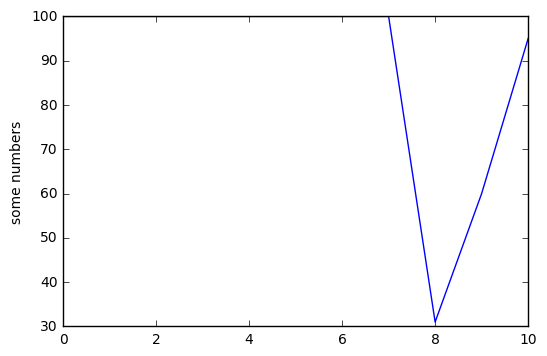

In [154]:
import matplotlib.pyplot as plt
plt.plot(mp[4])
plt.ylabel('some numbers')
plt.show()

In [155]:
def classifierError(truelabels,estimatedlabels):
    # Put your code here
    b=0
    for i in range (0,len(truelabels)):
        if estimatedlabels[i]!= truelabels[i]:
            b=b+1
    a=b/len(truelabels)
    return a 

From here, we start to do a general data set with traing 200, Varius PCA features , and varius Method

[  62.   65.    8.  100.   15.   95.   94.   90.    0.  100.   66.    5.
   10.   75.]


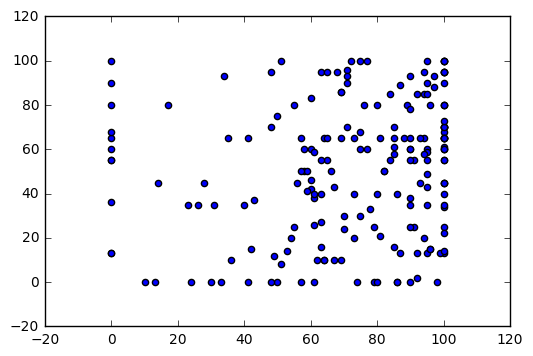

In [156]:
std = np.std(Final[:,4])
mean = np.mean(Final[:,4])
Final_label = [1 if Final[i,4]>mean+std  else 2 if Final[i][4] > mean else 3 if Final[i][4] > mean-std else 4 for i in range(0,len(Final))]
lab_att = lab_att.reshape(303,)
Feature = np.stack((FirstMT[:,4], SecondMT[:,4]))
Feature = Feature.T
Feature = np.concatenate((Feature, lab_att[:,None]), axis = 1)	# dimensions: 303 x 11
Feature = np.concatenate((Feature, mp),axis = 1)	#dimension: 303 x 22
print(Feature[40])
train_data=Feature[0:200,:]
train_label=Final_label[0:200]
val_data=Feature[200:250,:]
val_label=Final_label[200:250]
test_data=Feature[250:303,:]
test_label=Final_label[250:303]
scatter(train_data[:,0] ,train_data[:,12])

Lets start without PCA(component analyzis):

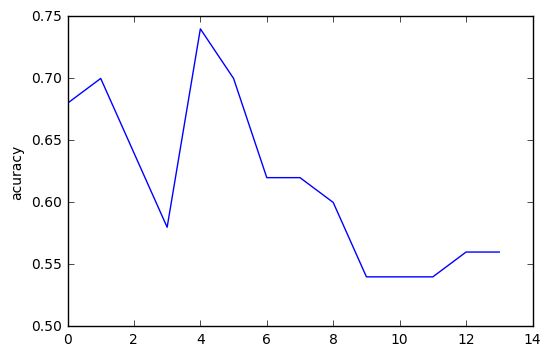

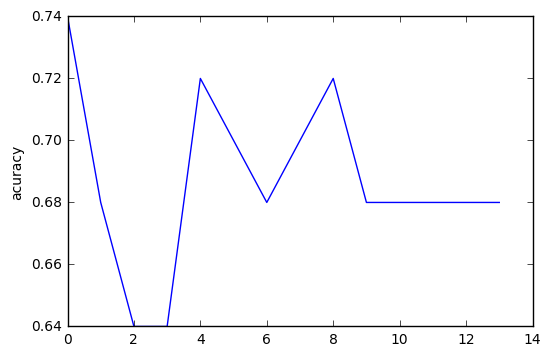

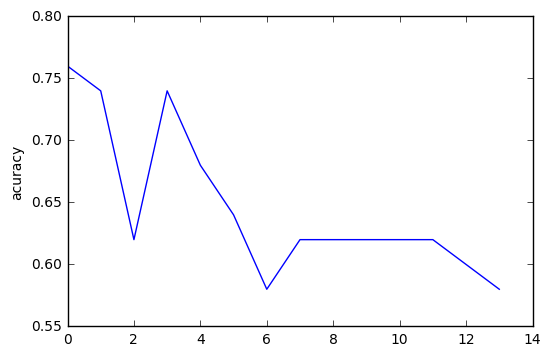

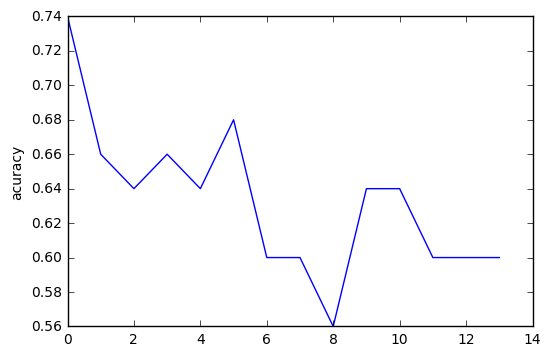

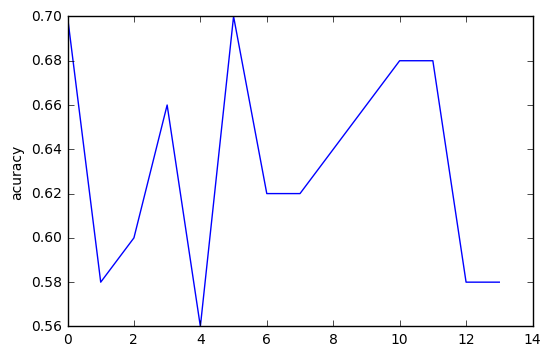

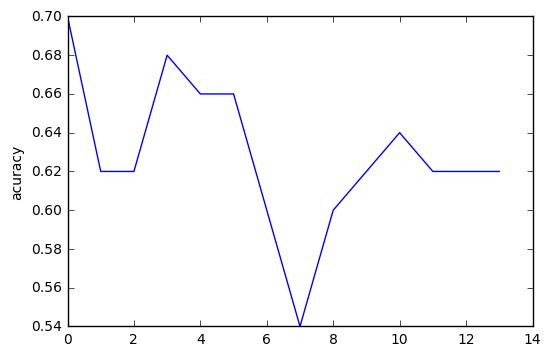

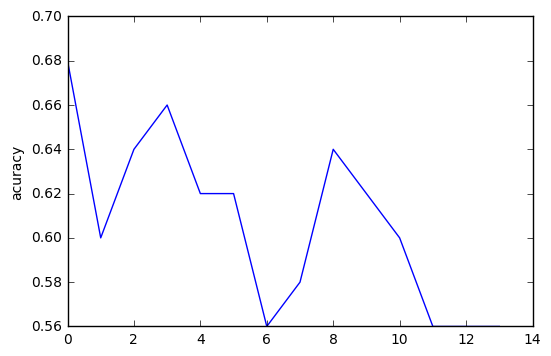

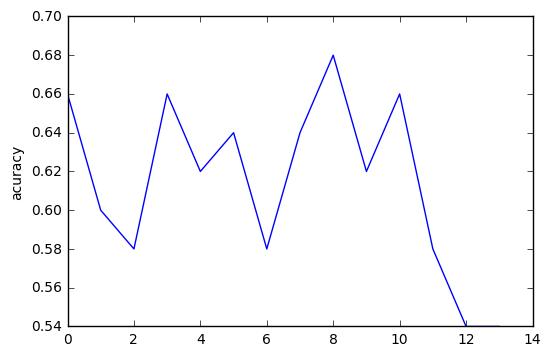

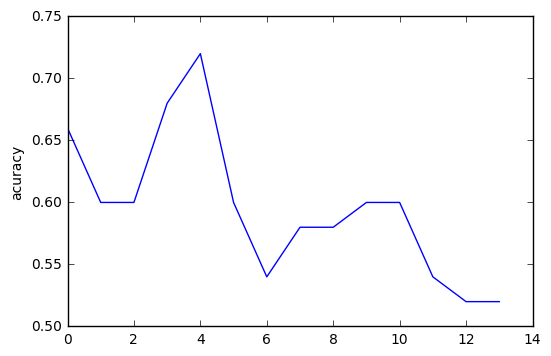

In [157]:
for j in range (1,10):
    e_neighbor=neighbors.KNeighborsClassifier(n_neighbors=j)
    result = []
    for i in range (1,15):
        a_neighbor=PCA(n_components = i)
        train_PCA=a_neighbor.fit_transform(train_data)
        b_neighbor=e_neighbor.fit(train_PCA,train_label)
        val_PCA = a_neighbor.transform(val_data)
        predict_val=b_neighbor.predict(val_PCA)
        result.append(classifierError(predict_val, val_label))
    plt.figure()
    plt.plot(result)
    plt.ylabel('acuracy')
    plt.show()

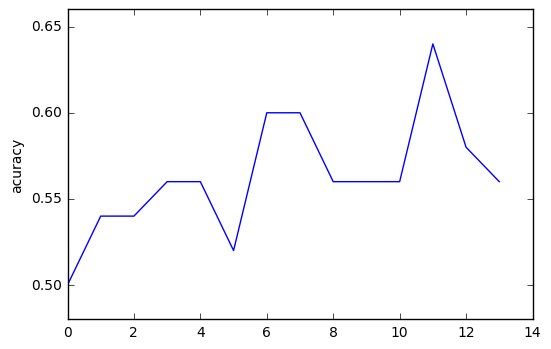

In [158]:
e_re=LogisticRegression()
result = []
for i in range (1,15):
    a_re=PCA(n_components = i)
    train_PCA=a_re.fit_transform(train_data)
    b_re=e_re.fit(train_PCA,train_label)
    val_PCA = a_re.transform(val_data)
    predict_val=b_re.predict(val_PCA)
    result.append(classifierError(predict_val, val_label))
plt.figure()
plt.plot(result)
plt.ylabel('acuracy')
plt.show()

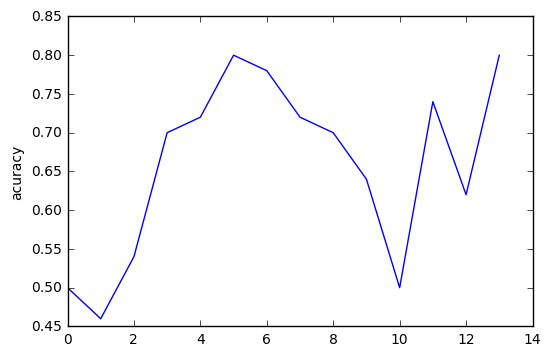

In [159]:
e_sv=LinearSVC ()
result = []
for i in range (1,15):
    a_sv=PCA(n_components = i)
    train_PCA=a_sv.fit_transform(train_data)
    b_sv=e_sv.fit(train_PCA,train_label)
    val_PCA = a_sv.transform(val_data)
    predict_val=b_sv.predict(val_PCA)
    result.append(classifierError(predict_val, val_label))
plt.figure()
plt.plot(result)
plt.ylabel('acuracy')
plt.show()

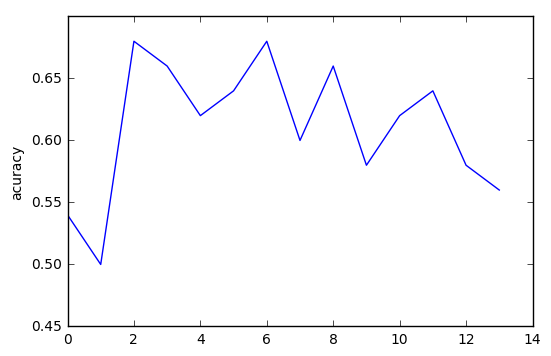

In [160]:
e_nb=(BernoulliNB ())
result = []
for i in range (1,15):
    a_nb=PCA(n_components = i)
    train_PCA=a_nb.fit_transform(train_data)
    b_nb=e_nb.fit(train_PCA,train_label)
    val_PCA = a_nb.transform(val_data)
    predict_val=b_nb.predict(val_PCA)
    result.append(classifierError(predict_val, val_label))
plt.figure()
plt.plot(result)
plt.ylabel('acuracy')
plt.show()

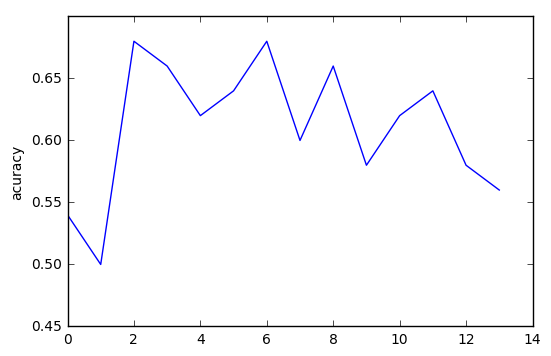

In [161]:
e_mnb=(BernoulliNB  ())
result = []
for i in range (1,15):
    a_mnb=PCA(n_components = i)
    train_PCA=a_mnb.fit_transform(train_data)
    b_mnb=e_mnb.fit(train_PCA,train_label)
    val_PCA = a_mnb.transform(val_data)
    predict_val=b_mnb.predict(val_PCA)
    result.append(classifierError(predict_val, val_label))
plt.figure()
plt.plot(result)
plt.ylabel('acuracy')
plt.show()

test with svm:

In [162]:
result = []
e_test=LinearSVC ()
a_test=PCA(n_components =3 )
train_PCA=a_test.fit_transform(train_data)
b_test=e_test.fit(train_PCA,train_label)
test_PCA = a_test.transform(test_data)
predict_test=b_test.predict(test_PCA)
print(classifierError(predict_test, test_label))

0.7169811320754716


From all the result above, we can observe many interesting facts:

1.in algrithm accruacy: SVM do have 

We want to see how training data by only using mp can affect the rediction result in FIRST MT, SECOND MT and FINAL,
We know that SVM algrithm will try to find a lieanr relation between the label and feature,
therefore by comparing different SVM result, we can find which exam has a better linear relation ship with the homework.

Here is the first midterm prediction

In [163]:
std = np.std(FirstMT[:,4])
mean = np.mean(FirstMT[:,4])
First_label = [1 if FirstMT[i,4]>mean+std  else 2 if FirstMT[i][4] > mean else 3 if FirstMT[i][4] > mean-std else 4 for i in range(0,len(FirstMT))]
train_data=mp[0:200,:]
train_label=First_label[0:200]
val_data=mp[200:250,:]
val_label=First_label[200:250]
test_data=mp[250:303,:]
test_label=First_label[250:303]

In [164]:
FI_SVC=LinearSVC ()
b_FI_SVC=FI_SVC.fit(train_data,train_label)
predict_test=b_FI_SVC.predict(test_data)
print(classifierError(predict_test, test_label))

0.7735849056603774


In [165]:
FI_N=neighbors.KNeighborsClassifier(n_neighbors=5)
b_FI_N=FI_N.fit(train_data,train_label)
predict_test=b_FI_N.predict(test_data)
print(classifierError(predict_test, test_label))

0.6415094339622641


In [166]:
FI_LR=LogisticRegression()
b_FI_LR=FI_LR.fit(train_data,train_label)
predict_test=b_FI_LR.predict(test_data)
print(classifierError(predict_test, test_label))

0.6415094339622641


Here is the second midterm prediction

In [167]:
std = np.std(SecondMT[:,4])
mean = np.mean(SecondMT[:,4])
Second_label = [1 if SecondMT[i,4]>mean+std  else 2 if SecondMT[i][4] > mean else 3 if SecondMT[i][4] > mean-std else 4 for i in range(0,len(SecondMT))]
train_data=mp[0:200,:]
train_label=Second_label[0:200]
val_data=mp[200:250,:]
val_label=Second_label[200:250]
test_data=mp[250:303,:]
test_label=Second_label[250:303]

In [168]:
FI_SVC=LinearSVC ()
b_FI_SVC=FI_SVC.fit(train_data,train_label)
predict_test=b_FI_SVC.predict(test_data)
print(classifierError(predict_test, test_label))

0.7547169811320755


In [169]:
FI_N=neighbors.KNeighborsClassifier(n_neighbors=5)
b_FI_N=FI_N.fit(train_data,train_label)
predict_test=b_FI_N.predict(test_data)
print(classifierError(predict_test, test_label))

0.7169811320754716


In [170]:
FI_LR=LogisticRegression()
b_FI_LR=FI_LR.fit(train_data,train_label)
predict_test=b_FI_LR.predict(test_data)
print(classifierError(predict_test, test_label))

0.7547169811320755


Here is the final prediction

In [171]:
std = np.std(Final[:,4])
mean = np.mean(Final[:,4])
Final_label = [1 if Final[i,4]>mean+std  else 2 if Final[i][4] > mean else 3 if Final[i][4] > mean-std else 4 for i in range(0,len(Final))]
train_data=mp[0:200,:]
train_label=Final_label[0:200]
val_data=mp[200:250,:]
val_label=Final_label[200:250]
test_data=mp[250:303,:]
test_label=Final_label[250:303]

In [172]:
FI_SVC=LinearSVC ()
b_FI_SVC=FI_SVC.fit(train_data,train_label)
predict_test=b_FI_SVC.predict(test_data)
print(classifierError(predict_test, test_label))

0.7735849056603774


In [173]:
FI_N=neighbors.KNeighborsClassifier(n_neighbors=5)
b_FI_N=FI_N.fit(train_data,train_label)
predict_test=b_FI_N.predict(test_data)
print(classifierError(predict_test, test_label))

0.5471698113207547


In [174]:
FI_LR=LogisticRegression()
b_FI_LR=FI_LR.fit(train_data,train_label)
predict_test=b_FI_LR.predict(test_data)
print(classifierError(predict_test, test_label))

0.6037735849056604


In [175]:
mp_final = np.zeros((len(mp),2))
for i in range(len(mp)):
    mp_final[i][0] = np.mean(mp[i])
    mp_final[i][1] = (FirstMT[i][4]+SecondMT[i][4]+Final[i][4])/3

In [176]:
scatter(mp_mean,final_mean)

NameError: name 'mp_mean' is not defined

In [177]:
t = KMeans(n_clusters=3,random_state=0).fit(mp_final)

In [178]:
t.labels_

array([0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 2, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 2, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 2, 0, 1, 1, 0, 1,
       2, 1, 0, 0, 0, 1, 2, 1, 2, 0, 1, 2, 1, 1, 0, 1, 0, 1, 0, 1, 2, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 2, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 0, 1,
       1, 1, 2, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 2, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 2, 0, 0, 0, 1, 0, 0, 1, 1, 0, 2, 1, 1, 0, 2, 1,
       2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 2, 2, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 2, 1,
       1, 1, 0, 1, 1, 1, 2, 0, 0, 0, 2, 2, 0, 1, 0, 1, 0, 1, 0, 1, 2, 0, 1,
       0, 1,

In [179]:
t.cluster_centers_
scatter(mp_mean,final_mean,c=t.labels_)
scatter(t.cluster_centers_[:,0],t.cluster_centers_[:,1],color = "r")

NameError: name 'mp_mean' is not defined

In [180]:
distance =[]
for i in range(1,10):
    t = KMeans(n_clusters=i,random_state=0).fit(mp_final)
    s=0.0
    for j in range(len(t.labels_)):
        s+=la.norm(t.cluster_centers_[t.labels_[j]]-mp_final[j])
    distance.append(s)
    plt.figure()
    print(t.cluster_centers_)
    scatter(mp_mean,final_mean,c=t.labels_)
    scatter(t.cluster_centers_[:,0],t.cluster_centers_[:,1],color = "r")
    


[[ 79.31683168  61.00440044]]


NameError: name 'mp_mean' is not defined

ValueError: x and y must have same first dimension

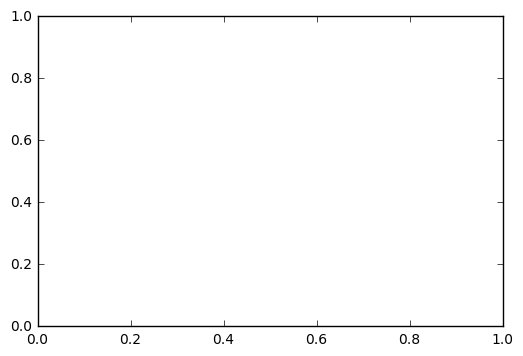

In [181]:
plt.plot(np.arange(1,10),distance)

In [182]:
distance

[7855.4170840512052]

In [183]:
t = KMeans(n_clusters=3,random_state=0).fit(mp_final)
t.labels_

array([0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 2, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 2, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 2, 0, 1, 1, 0, 1,
       2, 1, 0, 0, 0, 1, 2, 1, 2, 0, 1, 2, 1, 1, 0, 1, 0, 1, 0, 1, 2, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 2, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 0, 1,
       1, 1, 2, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 2, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 2, 0, 0, 0, 1, 0, 0, 1, 1, 0, 2, 1, 1, 0, 2, 1,
       2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 2, 2, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 2, 1,
       1, 1, 0, 1, 1, 1, 2, 0, 0, 0, 2, 2, 0, 1, 0, 1, 0, 1, 0, 1, 2, 0, 1,
       0, 1,

In [184]:
lazy = []
for i in range(len(mp_final)):
    if t.labels_[i]==1:
        lazy.append(mp_final[i])
lazy = np.array(lazy)

[[ 82.12508059  45.55319149]]
[[ 80.03719008  54.38257576]
 [ 85.59176672  30.89308176]]
[[ 70.8794926   55.40310078]
 [ 83.15324675  25.95238095]
 [ 89.22943723  49.71957672]]
[[ 86.40181818  56.74666667]
 [ 82.78181818  19.6       ]
 [ 66.64935065  53.27380952]
 [ 86.92389006  39.58139535]]
[[ 88.89646465  40.24074074]
 [ 66.67676768  53.87654321]
 [ 86.40181818  56.74666667]
 [ 88.48484848  16.27777778]
 [ 74.82386364  30.4375    ]]
[[ 89.8292011   39.95959596]
 [ 76.77597403  55.0952381 ]
 [ 89.93048128  56.21568627]
 [ 62.9144385   54.50980392]
 [ 75.0969697   32.71111111]
 [ 86.56493506  16.64285714]]


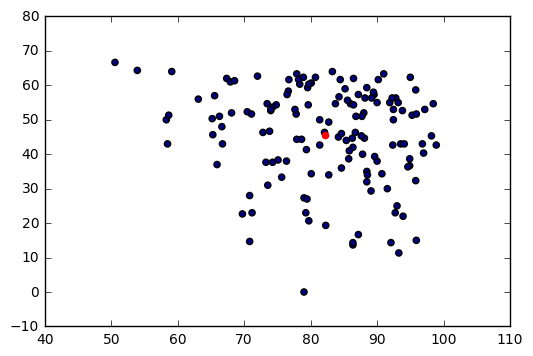

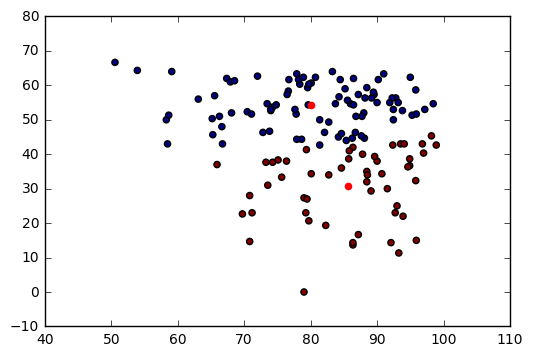

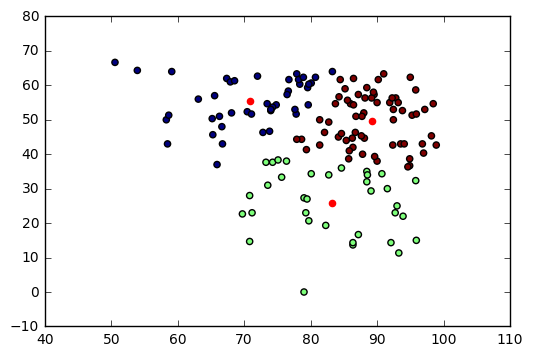

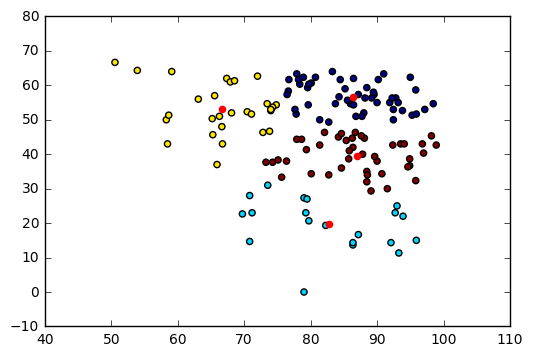

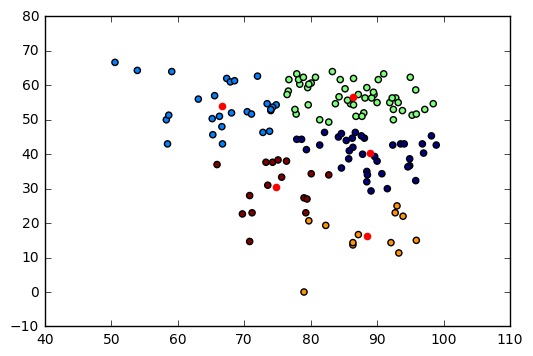

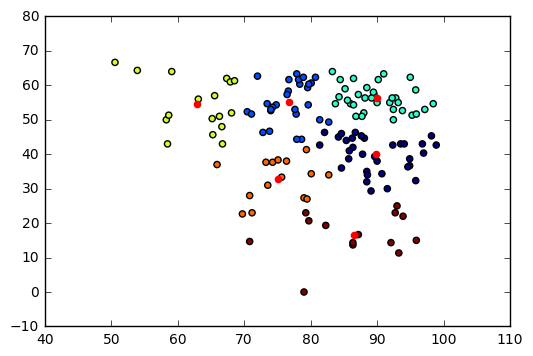

In [185]:
dis1 =[]
for i in range(1,7):
    t = KMeans(n_clusters=i,random_state=0).fit(lazy)
    s=0.0
    for j in range(len(t.labels_)):
        s+=la.norm(t.cluster_centers_[t.labels_[j]]-lazy[j])
    dis1.append(s)
    plt.figure()
    print(t.cluster_centers_)
    scatter(lazy[:,0],lazy[:,1],c=t.labels_)
    scatter(t.cluster_centers_[:,0],t.cluster_centers_[:,1],color = "r")

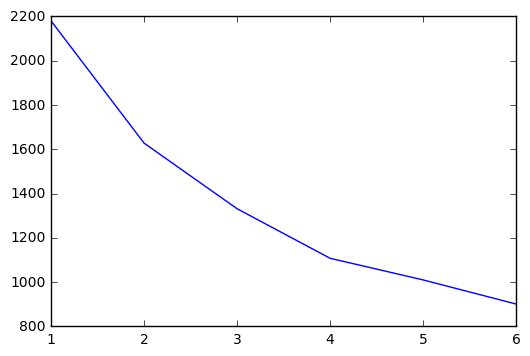

In [186]:
plt.plot(np.arange(1,7),dis1)

In [187]:
t = KMeans(n_clusters=5,random_state=0).fit(lazy)
t.labels_

array([1, 4, 2, 0, 4, 0, 2, 2, 2, 3, 2, 4, 2, 1, 4, 0, 0, 2, 1, 0, 0, 0, 3,
       0, 2, 2, 2, 1, 2, 0, 1, 0, 2, 2, 3, 1, 0, 1, 3, 0, 0, 0, 2, 4, 4, 0,
       2, 0, 2, 0, 3, 1, 0, 1, 0, 3, 2, 4, 0, 2, 3, 2, 1, 2, 1, 0, 0, 2, 2,
       1, 2, 4, 1, 2, 2, 1, 0, 2, 0, 1, 2, 3, 2, 1, 3, 2, 0, 0, 2, 1, 2, 4,
       0, 0, 2, 2, 2, 1, 2, 4, 0, 4, 3, 4, 2, 1, 4, 1, 3, 0, 1, 2, 0, 2, 1,
       2, 3, 0, 1, 4, 2, 4, 1, 2, 1, 2, 1, 2, 0, 2, 2, 2, 2, 0, 0, 2, 1, 0,
       4, 2, 2], dtype=int32)

In [188]:
stupid =[]
for i in range(len(lazy)):
    if t.labels_[i] == 3:
        stupid.append(lazy[i])
stupid = np.array(stupid)
stupid

array([[ 86.36363636,  13.66666667],
       [ 82.27272727,  19.33333333],
       [ 93.90909091,  22.        ],
       [ 92.09090909,  14.33333333],
       [ 93.        ,  25.        ],
       [ 92.72727273,  23.        ],
       [ 93.27272727,  11.33333333],
       [ 86.36363636,  14.33333333],
       [ 79.        ,   0.        ],
       [ 95.90909091,  15.        ],
       [ 79.72727273,  20.66666667],
       [ 87.18181818,  16.66666667]])

In [189]:
import tensorflow as tf

In [190]:
overall = np.zeros((len(mp),3))
for i in range(len(mp)):
    overall[i][0] = np.mean(mp[i])
    overall[i][1] = (FirstMT[i][4]+SecondMT[i][4]+Final[i][4])/3
    overall[i][2] = .5*lab_att[i]+.5*lab_score[i]

In [191]:
overall

array([[  86.81818182,   94.33333333,   13.5       ],
       [  70.54545455,   75.66666667,   13.5       ],
       [  66.72727273,   43.        ,   13.5       ],
       [  79.        ,   27.33333333,   13.5       ],
       [  89.63636364,   92.66666667,   13.5       ],
       [  95.        ,   90.        ,   13.5       ],
       [  95.        ,   62.33333333,   13.5       ],
       [  86.36363636,   42.        ,    8.        ],
       [  95.36363636,   96.66666667,   12.5       ],
       [  74.27272727,   37.66666667,   10.        ],
       [  84.27272727,   67.33333333,   14.5       ],
       [  94.90909091,   38.66666667,   10.5       ],
       [  95.27272727,   51.33333333,   13.5       ],
       [  11.54545455,   56.33333333,   11.        ],
       [  84.27272727,   56.66666667,   13.5       ],
       [  74.54545455,   76.66666667,   10.5       ],
       [  76.63636364,   58.33333333,    7.5       ],
       [  86.36363636,   13.66666667,   14.5       ],
       [  54.09090909,   98.

In [192]:
cluster = KMeans(n_clusters=4,random_state=0).fit(overall)

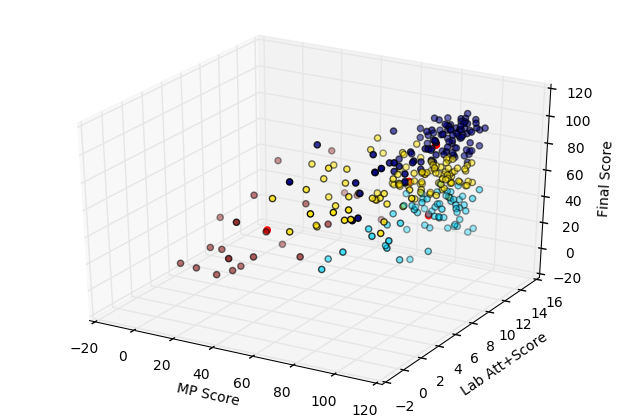

In [193]:
cluster
figure = plt.figure()
ax = Axes3D(figure)
ax.scatter(overall[:,0],overall[:,2],overall[:,1],c=cluster.labels_)
for i in range(4):
    ax.scatter(cluster.cluster_centers_[:,0],cluster.cluster_centers_[:,2],cluster.cluster_centers_[:,1],color = "r")
ax.set_xlabel('MP Score')
ax.set_ylabel('Lab Att+Score')
ax.set_zlabel('Final Score')

center 1 
         mp    .    final    .   lab 
 [[ 79.31683168  61.00440044  10.94059406]] 

center 2 
         mp    .    final    .   lab 
 [[ 72.91423671  42.21593291  10.5754717 ]
 [ 86.38636364  81.75        11.34375   ]] 

center 3 
         mp    .    final    .   lab 
 [[ 33.21630094  33.37931034   6.36206897]
 [ 86.12415197  83.28358209  11.25      ]
 [ 82.35064935  45.40238095  11.59285714]] 

center 4 
         mp    .    final    .   lab 
 [[ 88.07186147  87.0031746   11.55714286]
 [ 84.94886364  32.80729167  11.6640625 ]
 [ 77.94886364  59.44642857  10.88839286]
 [ 28.11157025  26.87878788   6.15909091]] 

center 5 
         mp    .    final    .   lab 
 [[ 57.99724518  58.28282828   9.22727273]
 [ 87.52822967  88.60350877  11.6       ]
 [ 85.84269663  61.39700375  11.33146067]
 [ 84.55902307  33.41791045  11.73134328]
 [ 26.23444976  23.1754386    6.        ]] 

center 6 
         mp    .    final    .   lab 
 [[ 87.88429752  89.5         11.76704545]
 [ 57.29476584  57.

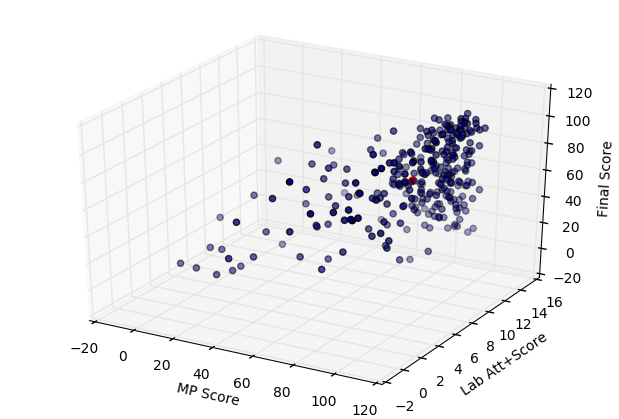

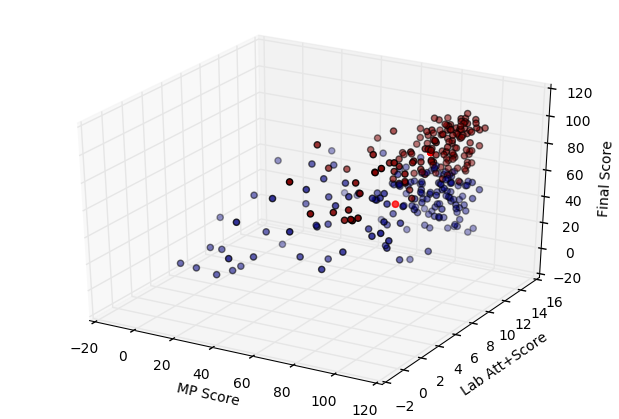

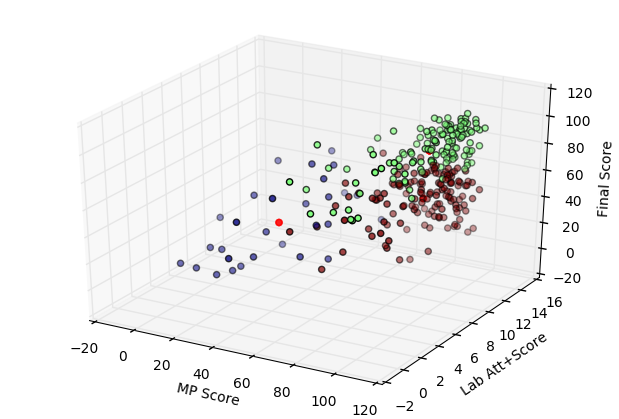

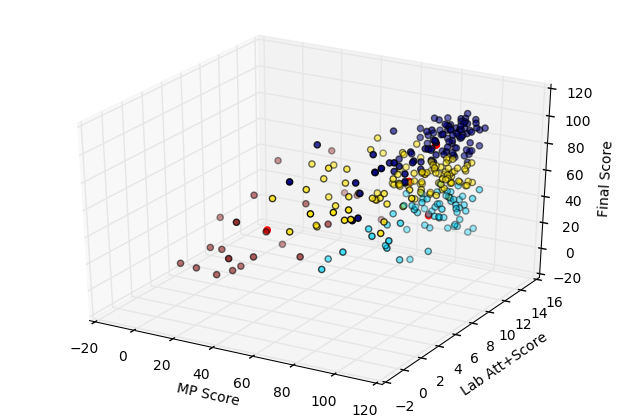

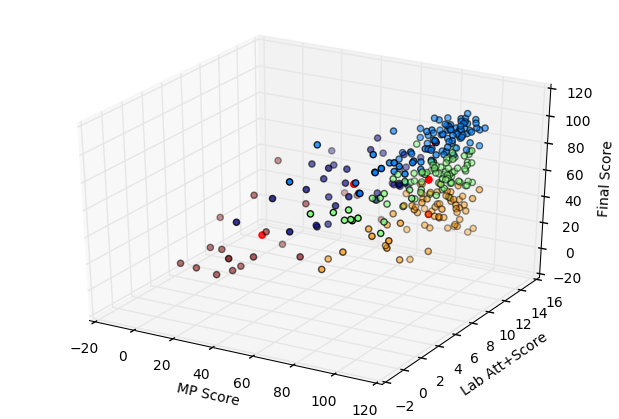

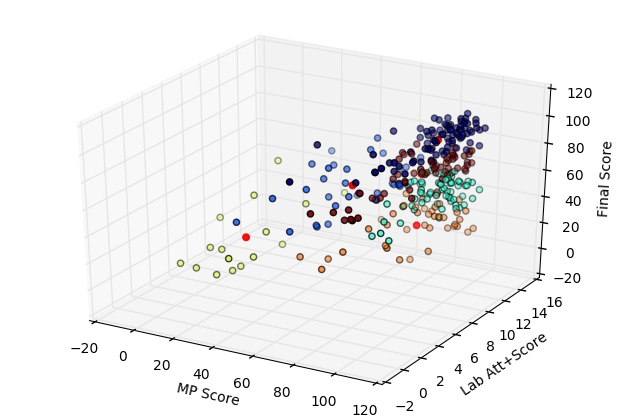

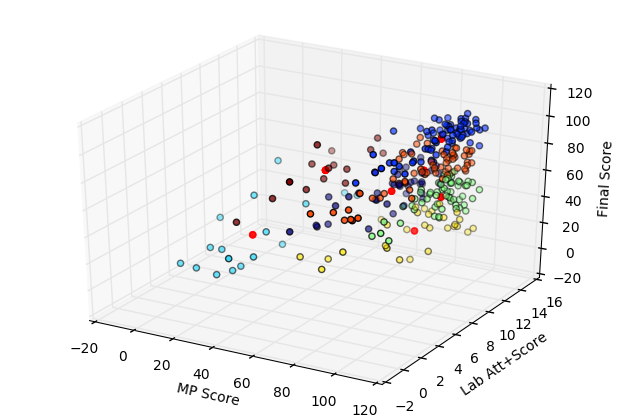

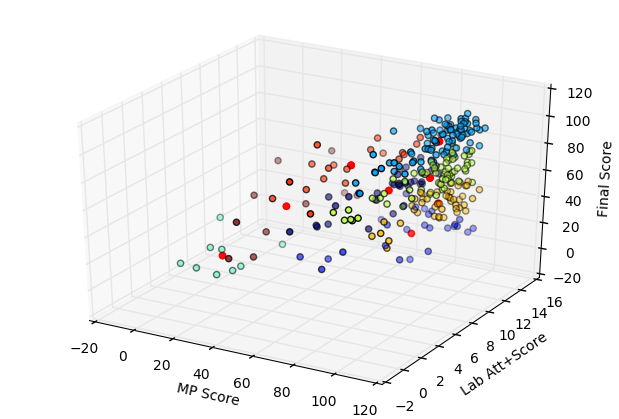

In [210]:
dis1 =[]
for i in range(1,9):
    cluster = KMeans(n_clusters=i,random_state=0).fit(overall)
    s=0.0
    for j in range(len(cluster.labels_)):
        s+=la.norm(cluster.cluster_centers_[cluster.labels_[j]]-overall[j])
    dis1.append(s)
    print("center",i,"\n","        mp    .    final    .   lab","\n",cluster.cluster_centers_,"\n")
    figure = plt.figure()
    ax = Axes3D(figure)
    ax.set_xlabel('MP Score')
    ax.set_ylabel('Lab Att+Score')
    ax.set_zlabel('Final Score')
    ax.scatter(overall[:,0],overall[:,2],overall[:,1],c=cluster.labels_)
    for j in range(4):
        ax.scatter(cluster.cluster_centers_[:,0],cluster.cluster_centers_[:,2],cluster.cluster_centers_[:,1],color = "r")

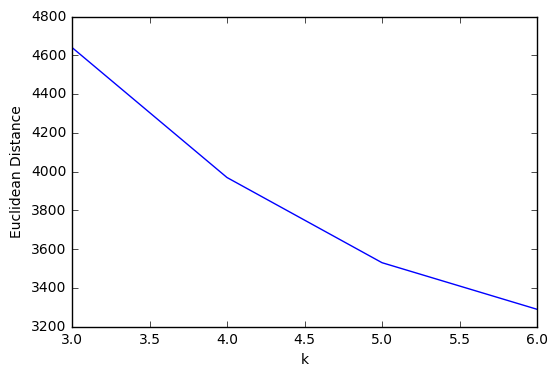

In [206]:
plt.plot(np.arange(3,7),dis1[2:6])
plt.xlabel("k")
plt.ylabel("Euclidean Distance")

In [148]:
(30*2**0.5-0.7-0.7-10)/0.037

838.5515370592661

In [212]:
cluster = KMeans(n_clusters=5,random_state=0).fit(overall)

In [219]:
lazy = []
for i in range(len(overall)):
    if cluster.labels_[i]==2:
        lazy.append(overall[i])
lazy = np.array(lazy)
lazy

array([[ 70.54545455,  75.66666667,  13.5       ],
       [ 95.        ,  62.33333333,  13.5       ],
       [ 84.27272727,  67.33333333,  14.5       ],
       [ 95.27272727,  51.33333333,  13.5       ],
       [ 84.27272727,  56.66666667,  13.5       ],
       [ 76.63636364,  58.33333333,   7.5       ],
       [ 82.72727273,  49.33333333,  10.5       ],
       [ 88.18181818,  56.33333333,  13.5       ],
       [ 89.45454545,  71.        ,  13.5       ],
       [ 93.18181818,  73.66666667,   1.        ],
       [ 95.72727273,  69.        ,  13.5       ],
       [ 92.45454545,  53.        ,  13.5       ],
       [ 92.36363636,  70.33333333,  14.5       ],
       [ 86.        ,  54.66666667,  12.5       ],
       [ 91.90909091,  55.        ,  11.5       ],
       [ 90.        ,  55.        ,  10.5       ],
       [ 80.72727273,  62.33333333,   3.        ],
       [ 74.81818182,  54.33333333,  13.5       ],
       [ 93.81818182,  52.66666667,   4.        ],
       [ 97.18181818,  53.     

center 1 
         mp    .    final    .   lab 
 [[ 85.84269663  61.39700375  11.33146067]] 

center 2 
         mp    .    final    .   lab 
 [[ 84.78044597  56.20125786  11.71698113]
 [ 87.40656566  69.0462963   10.76388889]] 

center 3 
         mp    .    final    .   lab 
 [[ 89.97805643  69.01149425  11.17241379]
 [ 77.23701299  60.8452381   10.71428571]
 [ 89.625       54.97916667  12.015625  ]] 

center 4 
         mp    .    final    .   lab 
 [[ 90.15454545  55.56666667  12.13333333]
 [ 78.11764706  66.29411765   8.76470588]
 [ 77.86931818  54.83333333  12.21875   ]
 [ 90.82517483  68.96153846  11.53846154]] 

center 5 
         mp    .    final    .   lab 
 [[ 78.22459893  65.78431373   9.32352941]
 [ 90.74125874  54.80769231  12.        ]
 [ 78.2459893   54.94117647  12.29411765]
 [ 88.70909091  71.46666667   3.2       ]
 [ 90.71590909  67.90277778  13.04166667]] 

center 6 
         mp    .    final    .   lab 
 [[ 87.35353535  56.24074074  12.25      ]
 [ 90.06397306  69.

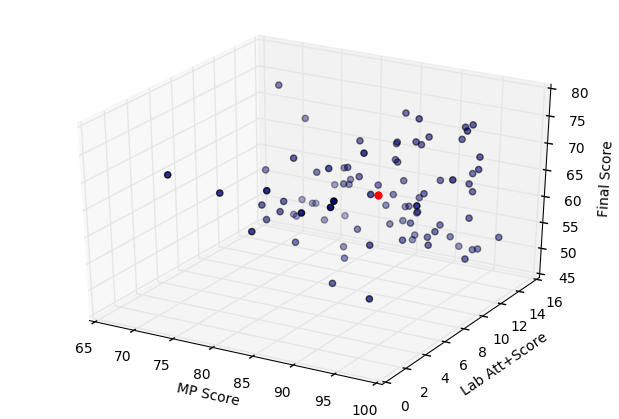

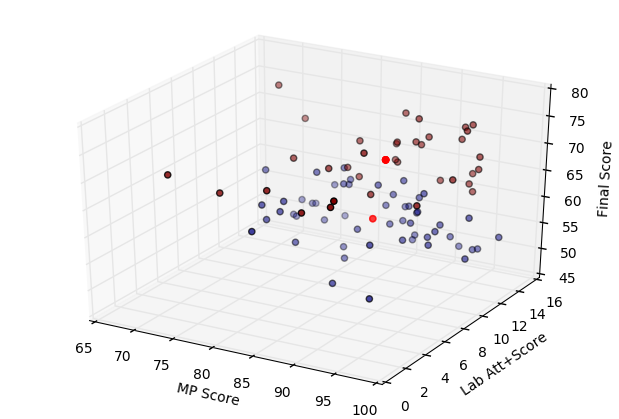

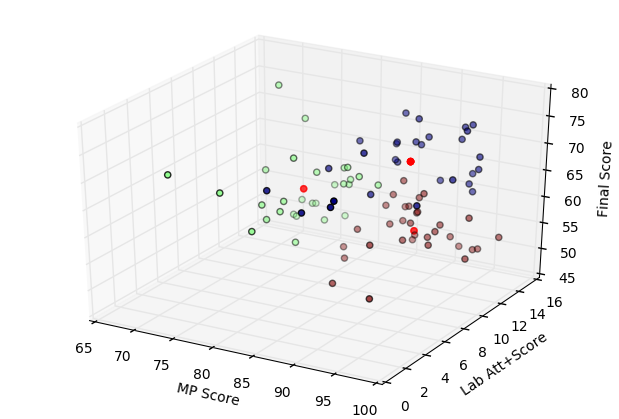

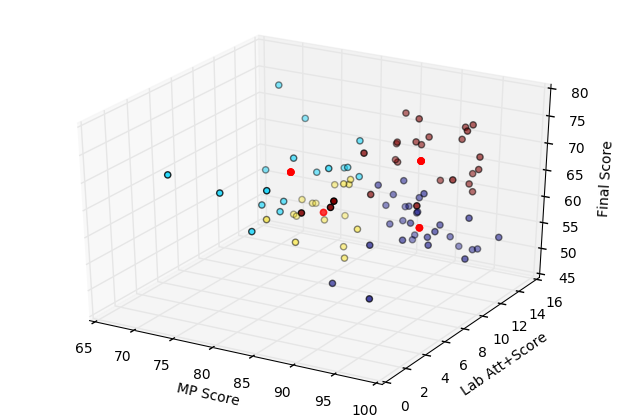

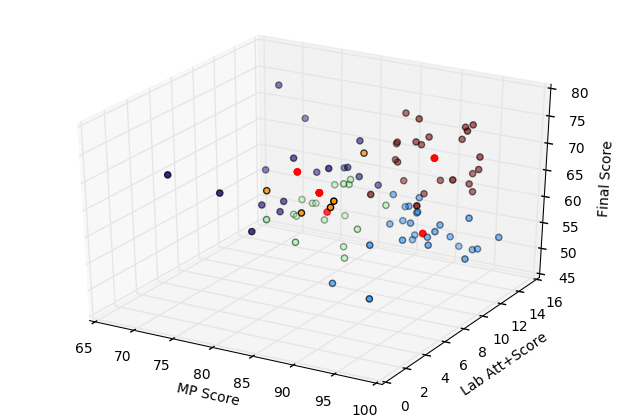

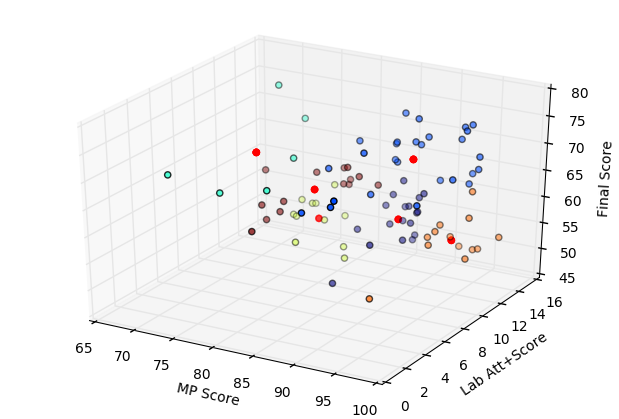

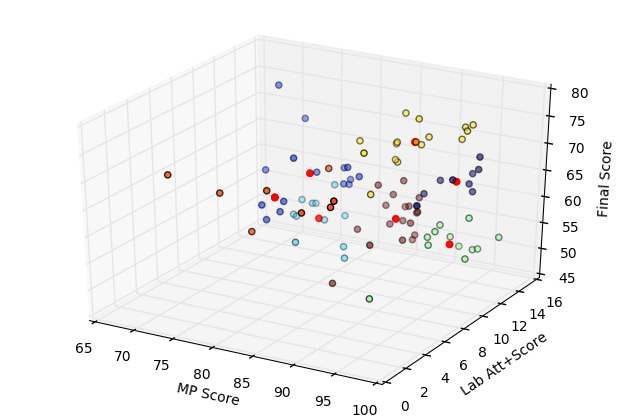

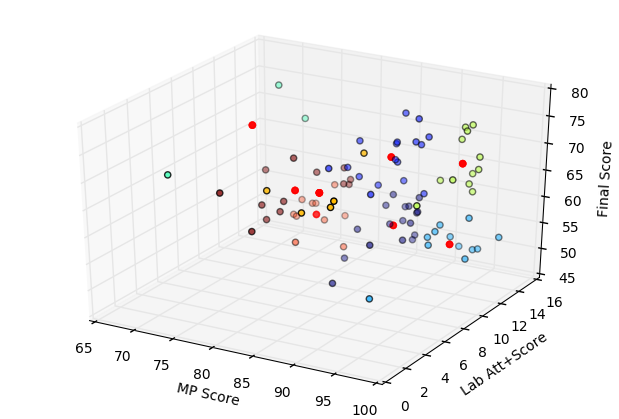

In [222]:
dis1 =[]
for i in range(1,9):
    cluster = KMeans(n_clusters=i,random_state=0).fit(lazy)
    s=0.0
    for j in range(len(cluster.labels_)):
        s+=la.norm(cluster.cluster_centers_[cluster.labels_[j]]-lazy[j])
    dis1.append(s)
    print("center",i,"\n","        mp    .    final    .   lab","\n",cluster.cluster_centers_,"\n")
    figure = plt.figure()
    ax = Axes3D(figure)
    ax.set_xlabel('MP Score')
    ax.set_ylabel('Lab Att+Score')
    ax.set_zlabel('Final Score')
    ax.scatter(lazy[:,0],lazy[:,2],lazy[:,1],c=cluster.labels_)
    for j in range(4):
        ax.scatter(cluster.cluster_centers_[:,0],cluster.cluster_centers_[:,2],cluster.cluster_centers_[:,1],color = "r")

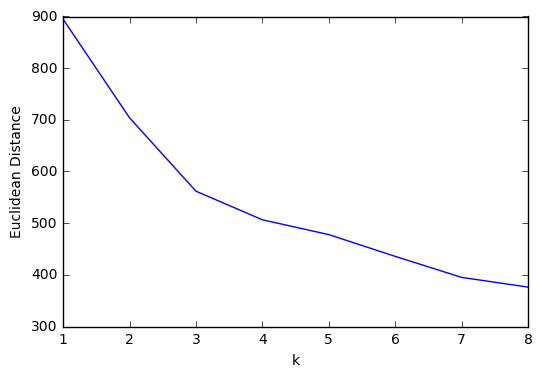

In [223]:
plt.plot(np.arange(1,9),dis1)
plt.xlabel("k")
plt.ylabel("Euclidean Distance")

In [224]:
cluster = KMeans(n_clusters=3,random_state=0).fit(lazy)

In [231]:
superlazy = []
for i in range(len(lazy)):
    if cluster.labels_[i]==2:
        superlazy.append(lazy[i])
superlazy = np.array(superlazy)
len(superlazy)

32

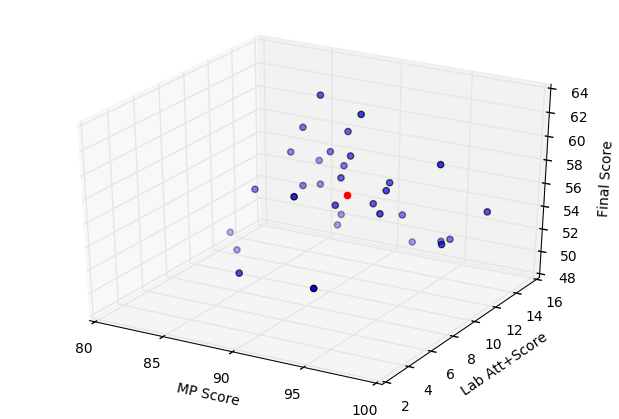

In [230]:
figure = plt.figure()
ax = Axes3D(figure)
ax.set_xlabel('MP Score')
ax.set_ylabel('Lab Att+Score')
ax.set_zlabel('Final Score')
ax.scatter(superlazy[:,0],superlazy[:,2],superlazy[:,1])
ax.scatter(cluster.cluster_centers_[2,0],cluster.cluster_centers_[2,2],cluster.cluster_centers_[2,1],color = "r")